# **Final Project:** Prediction of the Rate of Students Considered "Highly Gifted"

- Marcel Castro
- Ulises Fonseca

# **1. Introduction**



A dataset called ***2024 School Year Highly Capable Data*** will be used, which corresponds to information about demographic characteristics and groups of students considered "highly capable," compared to the general student population. The information corresponds to the state of Washington in the United States and is sectioned by state total, by school, and by district. This dataset was obtained from the *Data.gov* website, which offers open data provided by various governmental entities of the United States. The dataset structure is described below:

| **Column**                     | **Description**                                                                                                         |
|-------------------------------|-------------------------------------------------------------------------------------------------------------------------|
| `SchoolYear`                  | School year (2024).                                                                                                     |
| `OrgLevel`                   | Organization level of the data (state, district, or school).                                                            |
| `OrganizationID`             | Unique identifier for each organization.                                                                                |
| `SchoolName`                 | Name of the school. If it is state-level, it will be "State Total"; if district-level, it will be "District Total".      |
| `DistrictOrganizationID`     | Unique identifier for each district. If the data is state-level, this will be NULL.                                     |
| `DistrictName`               | Name of the district. If the data is state-level, this will be "State Total".                                           |
| `StudentGroupType`           | Describes the type of student group. Groups include ethnicity, income, students with disabilities, among others.        |
| `StudentGroup`               | Describes the specific subgroup for each group type; for example, for ethnicity it could be Hispanic, Asian, etc.       |
| `DisclosureAvoidanceTechnique` | Describes what is required to ensure the security of individual student data.                                           |
| `TotalStudents`              | Total number of students in each group.                                                                                 |
| `HighlyCapableTotal`         | Number of students in the group designated as highly capable.                                                           |
| `HighlyCapableRate`          | Percentage of students in the group designated as highly capable.                                                       |
| `NonHighlyCapableTotal`      | Total number of students in the group not designated as highly capable.                                                  |
| `NonHighlyCapableRate`       | Percentage of students in the group not designated as highly capable.                                                   |
| `DataAsOf`                   | Date when the data was extracted from the OSPI database.                                                                |

The website also provides the following information regarding the data:

- When a student group count or rate that has been protected could be calculated based on other reported numbers OSPI may only display rates and not counts
- Student group definitions:
  - Highly Capable: Students who perform at or show potential for performing at significantly advanced academic levels. A student's participation in the Highly Capable program is determined by districts
  - Highly Mobile: includes students with status as a migratory child, students with status as a homeless child or youth, students with status as a child in foster care, and students with a parent that is a member of the military
  - Low Income: Free and Reduced Price Meal (FRPM) eligibility is used as a proxy for low-income. The source of this data is the information submitted by school districts through the Comprehensive Education Data and Research System (CEDARS)
  - Section 504: includes students with disabilities who qualify for accommodations, aids, or services under Section 504 of the Rehabilitation Act of 1973
  - Students with disabilities: includes students with an individual education plan (IEP)
- Students are included in a student group total if they were identified by districts as being in that student group at any point during the school year.

# **2. Access to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Loading libraries**



In [ ]:
# Import de librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# **4. Loading dataset**

In [ ]:
file_path = '/content/drive/My Drive/LabsUlisesMarcel/Proyecto/2024_School_Year_Highly_Capable_Data.csv'

# Cargar el dataset
data = pd.read_csv(file_path)

# **5. Initial Data Visualization and Preprocessing**


In [ ]:
# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(data.head())

# Información general del dataset
print("\nInformación general:")
print(data.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(data.describe())

Primeras filas del dataset:
   SchoolYear OrgLevel  OrganizationID   SchoolName  DistrictOrganizationID  \
0        2024    State          103300  State Total                     NaN   
1        2024    State          103300  State Total                     NaN   
2        2024    State          103300  State Total                     NaN   
3        2024    State          103300  State Total                     NaN   
4        2024    State          103300  State Total                     NaN   

  DistrictName      StudentGroupType                     StudentGroup  \
0  State Total           AllStudents                     All Students   
1  State Total        EnglishLearner        English Language Learners   
2  State Total        EnglishLearner    Non-English Language Learners   
3  State Total  FederalRaceEthnicity  American Indian/ Alaskan Native   
4  State Total  FederalRaceEthnicity                            Asian   

  DisclosureAvoidanceTechnique  TotalStudents  HighlyCapab

In [ ]:
# We begin by removing the columns SchoolYear, DisclosureAvoidanceTechnique,
# and DataAsOf since they do not provide relevant information for our analysis
data = data.drop(columns=['SchoolYear', 'DisclosureAvoidanceTechnique', 'DataAsOf'])

# We search for null values in each column
print("\nValores nulos en cada columna:")
print(data.isnull().sum())


Valores nulos en cada columna:
OrgLevel                      0
OrganizationID                0
SchoolName                    0
DistrictOrganizationID       20
DistrictName                  0
StudentGroupType              0
StudentGroup                  0
TotalStudents             38721
HighlyCapableTotal        38721
HighlyCapableRate             0
NonHighlyCapableTotal     38721
NonHighlyCapableRate          0
dtype: int64


In [ ]:
data.head(50)

,OrgLevel,OrganizationID,SchoolName,DistrictOrganizationID,DistrictName,StudentGroupType,StudentGroup,TotalStudents,HighlyCapableTotal,HighlyCapableRate,NonHighlyCapableTotal,NonHighlyCapableRate
0,State,103300,State Total,NaN,State Total,AllStudents,All Students,1148732.0,83581.0,7.28%,1065151.0,92.72%
1,State,103300,State Total,NaN,State Total,EnglishLearner,English Language Learners,169967.0,1942.0,1.14%,168025.0,98.86%
2,State,103300,State Total,NaN,State Total,EnglishLearner,Non-English Language Learners,978765.0,81639.0,8.34%,897126.0,91.66%
3,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,American Indian/ Alaskan Native,13780.0,342.0,2.48%,13438.0,97.52%
4,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,Asian,101868.0,18311.0,17.98%,83557.0,82.02%
5,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,Black/ African American,56563.0,1715.0,3.03%,54848.0,96.97%
6,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,Hispanic/ Latino of any race(s),302449.0,10534.0,3.48%,291915.0,96.52%
7,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,Native Hawaiian/ Other Pacific Islander,17251.0,212.0,1.23%,17039.0,98.77%
8,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,Two or More Races,106125.0,8279.0,7.80%,97846.0,92.20%
9,State,103300,State Total,NaN,State Total,FederalRaceEthnicity,White,550513.0,44171.0,8.02%,506342.0,91.98%


In [ ]:
# We identify that null values in DistrictOrganizationID correspond to
# rows that represent state total data, they will be replaced by
# 'State_Total'
# data['DistrictOrganizationID'].fillna(-1, inplace=True)

data['DistrictOrganizationID']=data['DistrictOrganizationID'].fillna(-1)

# # Null values in TotalStudents, HighlyCapableTotal and NonHighlyCapableTotal
# # correspond to columns that don't record students, they will be replaced with 0

data['TotalStudents']=data['TotalStudents'].fillna(0)
data['HighlyCapableTotal']=data['HighlyCapableTotal'].fillna(0)
data['NonHighlyCapableTotal']=data['NonHighlyCapableTotal'].fillna(0)

# In the HighlyCapableRate and NonHighlyCapableRate columns we find special
# values like 'N<10' that will be replaced by 0, and the % symbol that will
# be removed to handle these percentages as numbers
data['HighlyCapableRate'] = data['HighlyCapableRate'].replace({'N<10': 0.0}, regex=True)
data['HighlyCapableRate'] = data['HighlyCapableRate'].replace({'<': ''}, regex=True)
data['HighlyCapableRate'] = data['HighlyCapableRate'].replace({'>': ''}, regex=True)
data['HighlyCapableRate'] = data['HighlyCapableRate'].replace({'%': ''}, regex=True)

data['NonHighlyCapableRate'] = data['NonHighlyCapableRate'].replace({'N<10': 0.0}, regex=True)
data['NonHighlyCapableRate'] = data['NonHighlyCapableRate'].replace({'<': ''}, regex=True)
data['NonHighlyCapableRate'] = data['NonHighlyCapableRate'].replace({'>': ''}, regex=True)
data['NonHighlyCapableRate'] = data['NonHighlyCapableRate'].replace({'%': ''}, regex=True)

# The HighlyCapableRate and NonHighlyCapableRate columns remain as object type,
# so we convert them to float
data['HighlyCapableRate'] = data['HighlyCapableRate'].astype(float)
data['NonHighlyCapableRate'] = data['NonHighlyCapableRate'].astype(float)

# Now we normalize the numeric columns except for OrganizationId and
# DistrictOrganizationId
num_cols = ['TotalStudents', 'HighlyCapableTotal', 'NonHighlyCapableTotal', 'HighlyCapableRate', 'NonHighlyCapableRate']

# Min-Max Scaling is applied to normalize values between 0 and 1
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# data.head(35)

A process was carried out to handle null values and special characters, now with this data we can make other conversions such as label encoding and one hot encoding.

On the other hand, what is sought with this dataset is to predict the value of HighlyCapableRate, therefore some columns that could potentially "leak" the answer to the algorithm will have to be removed, such as NonHighlyCapableRate, TotalStudents, NonHighlyCapableTotal and HighlyCapableTotal, as can be seen in the following correlation graph.

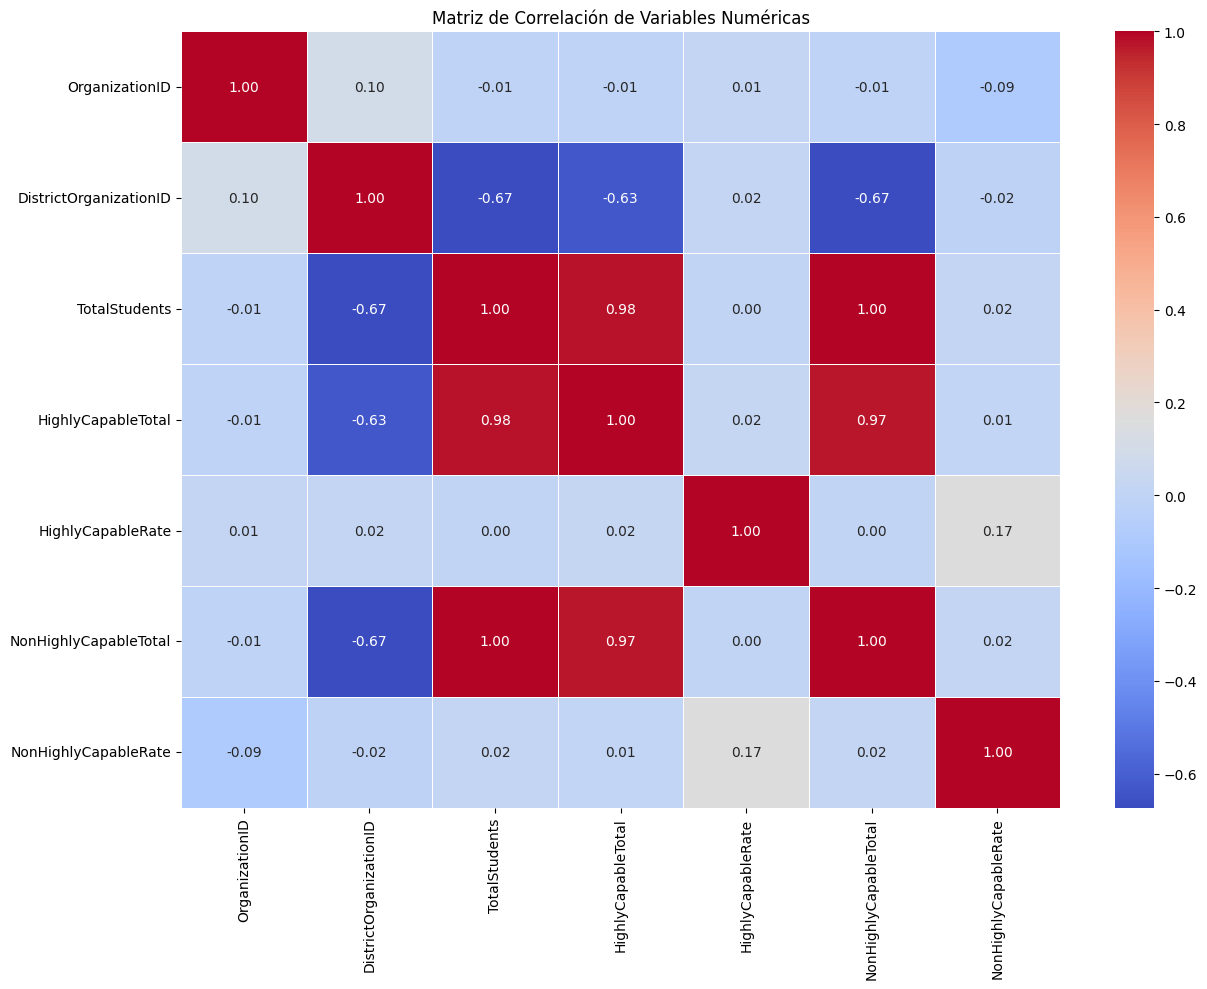

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Configure the graph size according to what we need
plt.figure(figsize=(13, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 10})

# Graph title
plt.title('Correlation Matrix of Numeric Variables')

plt.tight_layout()

# Show the graph
plt.show()

Some very high correlations can be seen, such as those between TotalStudents and NonHighlyCapableTotal and HighlyCapableTotal, as well as between HighlyCapableTotal and NonHighlyCapableTotal. It should be noted that these relationships are quite skewed due to a high number of zero values in the HighlyCapableTotal, NonHighlyCapableTotal, and TotalStudents columns. Subsequently, the columns TotalStudents, HighlyCapableTotal, NonHighlyCapableTotal, and NonHighlyCapableRate will be removed to avoid providing extra information to the models.

The SchoolName and DistrictName columns will also be removed since their information is redundant with respect to the OrganizationID and DistrictOrganizationID columns. Both options represent the same information in different formats, so only the ID columns will be kept. These columns will be treated as categorical data by applying label encoding, in this way we seek to avoid inducing any type of order or hierarchy.

Finally, One Hot Encoding will be applied to the OrgLevel, StudentGroup, and StudentGroupType columns to be able to use them within the models.

In [ ]:
# Eliminamos las columnas de NonHighlyCapableTotal, HighlyCapableTotal,
# NonHighlyCapableRate y TotalStudents
data = data.drop(columns=['NonHighlyCapableTotal', 'HighlyCapableTotal',
                                      'NonHighlyCapableRate', 'TotalStudents'])

# Ahora eliminamos SchoolName y DistrictName
data = data.drop(columns=['SchoolName', 'DistrictName'])

# Label encoding para las columnas de OrganizationID y DistrictOrganizationID
le = LabelEncoder()
data['OrganizationID'] = le.fit_transform(data['OrganizationID'])
data['DistrictOrganizationID'] = le.fit_transform(data['DistrictOrganizationID'])

# Hacemos OneHotEncoding en OrgLevel, StudentGroupType y StudentGroup
data = pd.get_dummies(data, columns=['OrgLevel', 'StudentGroupType', 'StudentGroup'])

# data.head(35)

In [ ]:
# Obtenemos las columnas one hot encoded y las convertimos en int
one_hot_columns = [col for col in data.columns if col.startswith(('OrgLevel', 'StudentGroupType', 'StudentGroup'))]
data[one_hot_columns] = data[one_hot_columns].astype(int)

# data.head(40)

After all these steps, we can plot the distribution of the data in the HighlyCapableRate column.

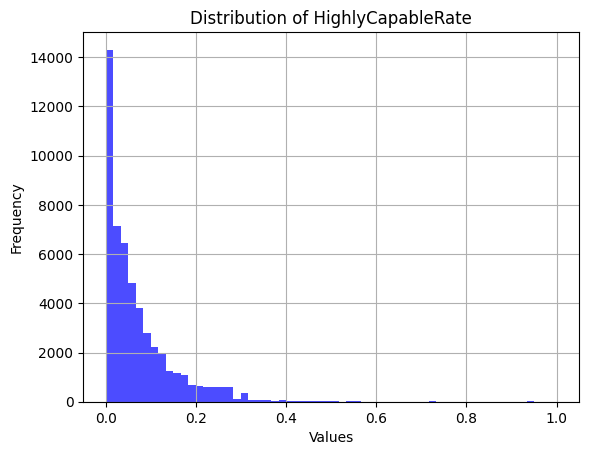

In [ ]:
plt.hist(data['HighlyCapableRate'], bins=60, alpha=0.7, color='blue')
plt.title('Distribution of HighlyCapableRate')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We can see that the data is heavily skewed towards 0, which indicates that the percentage of students considered "highly capable" is low. It is identified that this bias can significantly affect the performance of our algorithms.

# **6. Execution and evaluation of regression models**

In [ ]:
# Finalize by splitting the dataset into training and testing
# Prepare data for supervised algorithms
# Define the target variable (y) and predictor variables (X)
X = data.drop(columns=['HighlyCapableRate'])  # Change for your target variable if different
y = data['HighlyCapableRate']

# This ensures we don't modify the original X while working with unsupervised algorithms.
X_clustering = X.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_test_pred = model.predict(X_test)

Test Performance:
Mean Absolute Error (MAE): 0.056685295385354675
Mean Squared Error (MSE): 0.007233043524404308


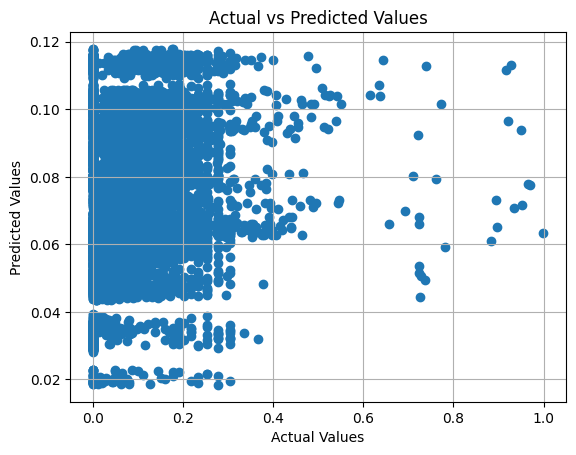

In [ ]:
# Print metrics
print('Test Performance:')
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_test_pred)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_test_pred)}')

# Plot Predicted vs Actual values
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

From the predictions vs actual values graph, it can be identified that the model predicts low values well but has poor performance on higher values. From the MAE, good results could be concluded, however this is biased by the prediction of low values. The MSE reflects problems with extreme values. More complex models will be attempted.

Mean Absolute Error (MAE): 0.04406123208508777
Mean Squared Error (MSE): 0.00534086848878194


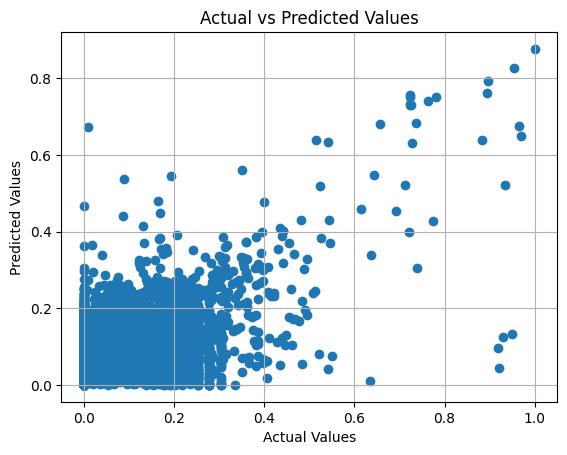

In [ ]:
# Inicializamos el random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print(f'Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}')

# Plot Predicted vs Actual values
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

From the graph, better results can be seen compared to linear regression, although there is still some bias towards values close to 0. The MAE and MSE also indicate better results than linear regression.

In [ ]:
# Train the model with an optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering)  # Use only predictors not the target

# Add clusters as a feature to the dataset
data['Cluster'] = clusters

# Evaluate clustering performance using the silhouette score
silhouette_avg = silhouette_score(X_clustering, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5541929435829547


 The Silhouette score measures the cohesion and separation of the generated clusters:
 
 Values close to 1 indicate well-defined and separated clusters.
 
 Values close to 0 indicate that points are near the decision boundary between two clusters.
 
 Negative values indicate that points are assigned to the wrong cluster.
 
 With a value of 0.55, the clusters are moderately well-defined, indicating good structure but with some overlap between clusters.

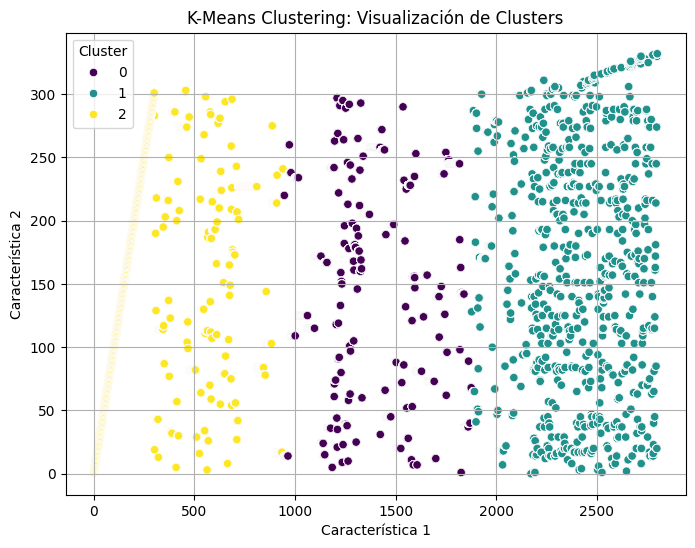

In [ ]:
# Scatter plot for the first two variables of the dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_clustering.iloc[:, 0], y=X_clustering.iloc[:, 1], hue=data['Cluster'], palette='viridis')
plt.title('K-Means Clustering: Visualización de Clusters')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Scatter Plot (Generated Clusters)**
 
The data is reasonably well separated into clusters.
However, there are intersection areas, which explains why the Silhouette Score is not close to 1.
 
This plot is based on the first two features of the dataset, which may not completely capture the separation in a higher-dimensional feature space.

Cluster
0    0.074853
1    0.069062
2    0.067777
Name: HighlyCapableRate, dtype: float64


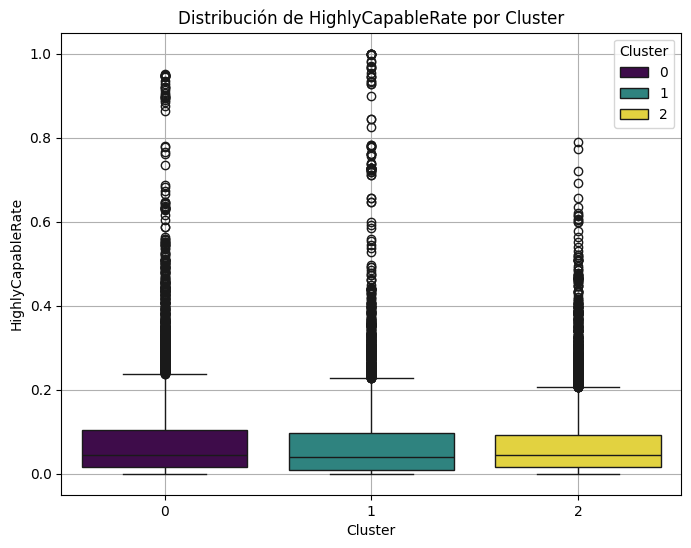

In [ ]:
# Analizar la media de HighlyCapableRate en cada cluster
cluster_means = data.groupby('Cluster')['HighlyCapableRate'].mean()
print(cluster_means)

# Boxplot para visualizar la distribución de HighlyCapableRate por cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='HighlyCapableRate', data=data, hue='Cluster', palette='viridis', dodge=False)
plt.title('Distribución de HighlyCapableRate por Cluster')
plt.xlabel('Cluster')
plt.ylabel('HighlyCapableRate')
plt.grid(True)
plt.show()

Cluster 0: Has the highest average of HighlyCapableRate (0.074853), indicating that this group is associated with higher rates of highly capable students.

Cluster 1 and Cluster 2: Present lower averages, suggesting that these groupings have less favorable characteristics related to HighlyCapableRate.

**Boxplot of HighlyCapableRate by Cluster**

Cluster 0: Has a higher median compared to the other clusters, which reinforces that this group has higher rates of highly capable students.

Cluster 1 and Cluster 2: Have similar distributions, with lower medians and smaller ranges.

Outliers are visible in all three clusters, indicating that there are extreme values in HighlyCapableRate.


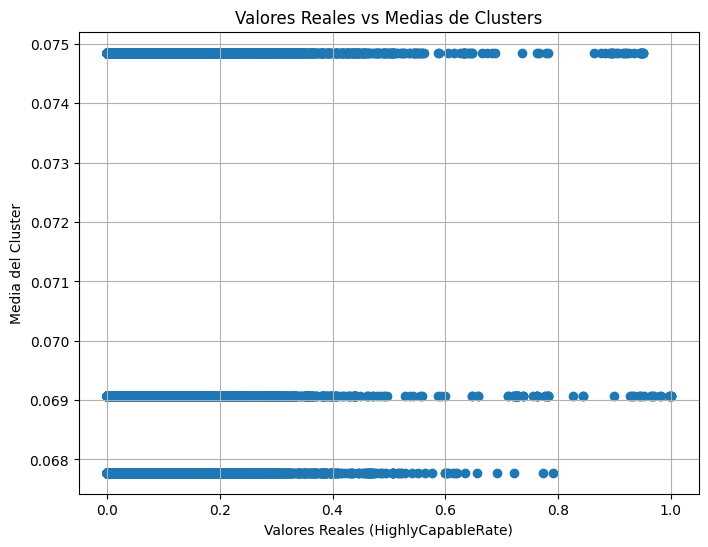

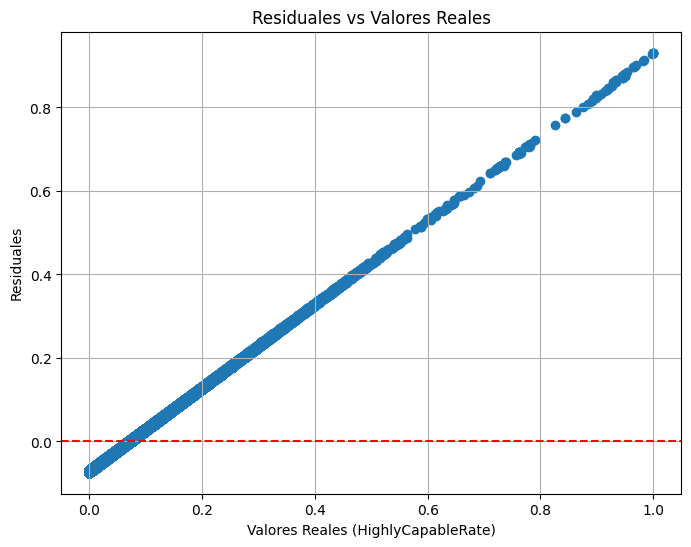

In [ ]:
# Calculate pseudo-residuals as the difference between cluster mean and real value
data['ClusterMean'] = data['Cluster'].map(cluster_means)
data['Residuals'] = data['HighlyCapableRate'] - data['ClusterMean']

# Scatter plot: Real values vs Media del Cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['HighlyCapableRate'], data['ClusterMean'])
plt.xlabel('Valores Reales (HighlyCapableRate)')
plt.ylabel('Media del Cluster')
plt.title('Valores Reales vs Medias de Clusters')
plt.grid(True)
plt.show()

# Scatter plot: Residuales
plt.figure(figsize=(8, 6))
plt.scatter(data['HighlyCapableRate'], data['Residuals'])
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at y=0
plt.xlabel('Valores Reales (HighlyCapableRate)')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Reales')
plt.grid(True)
plt.show()

**Real Values vs Cluster Mean Chart**

Most points cluster around the cluster means (0.074853, 0.069062, 0.067777).
Reflects that real values are well represented by cluster means, although there is some dispersion.

**Residuals Chart**

Most residuals are close to 0, indicating that cluster means reasonably capture the behavior of the data.
However, some points have large residuals, suggesting that cluster means do not perfectly represent those values.

# **7. Neural Network Execution and Evaluation**

After evaluating the dataset with linear regression, random forest, and k-means models, we will now evaluate using neural networks, starting with a Feedforward Neural Network.

In [ ]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Reduce dropout if necessary
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='mse',
              metrics=['mae'])


# Start a timer to measure training time
start_time = time.time()

# Define EarlyStopping to stop training if there's no improvement in 'val_loss'
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

end_time = time.time()

# Calculate total training time
elapsed_time = end_time - start_time

# Print total time
minutes, seconds = divmod(elapsed_time, 60)
print(f"Tiempo total de entrenamiento: {int(minutes):02d}:{int(seconds):02d} (mm:ss)")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4616.3521 - mae: 42.2331 - val_loss: 175.5095 - val_mae: 10.5846
Epoch 2/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 284.6379 - mae: 11.4174 - val_loss: 3.5007 - val_mae: 1.5110
Epoch 3/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100.4203 - mae: 6.7322 - val_loss: 1.9897 - val_mae: 1.1995
Epoch 4/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 39.7612 - mae: 4.0770 - val_loss: 1.5306 - val_mae: 1.0783
Epoch 5/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 16.1924 - mae: 2.4224 - val_loss: 1.5844 - val_mae: 1.1268
Epoch 6/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.2234 - mae: 1.5040 - val_loss: 0.5109 - val_mae: 0.5635
Epoch 7/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.5361 - mae: 0.9228 - val_loss: 0.3272 - val_mae: 0.4439
Epoch 8/50
1037/1037 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8108 - mae: 0.5954 - val_loss: 0.3668 - val_mae: 0.4831
Epoch 9/50
1037/1037 ━━━━━

In [ ]:
y_pred = model.predict(X_test)

324/324 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


MAE: 0.0586, MSE: 0.0076


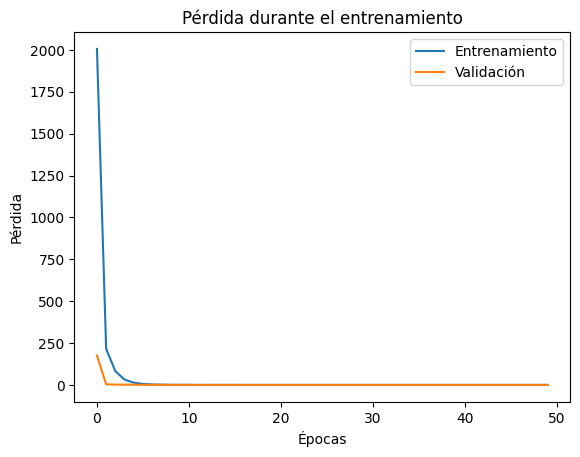

In [ ]:
# Métricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}")

# Visualización de la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

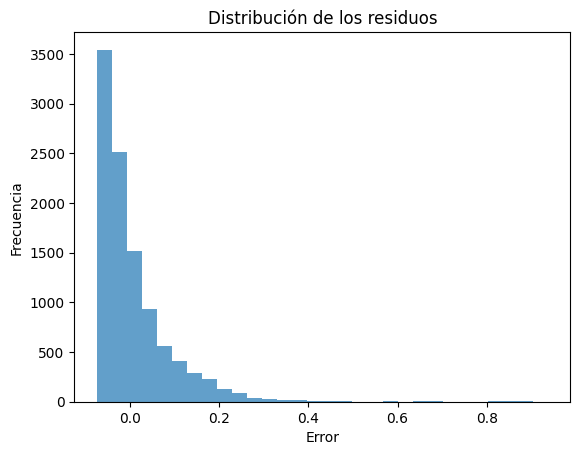

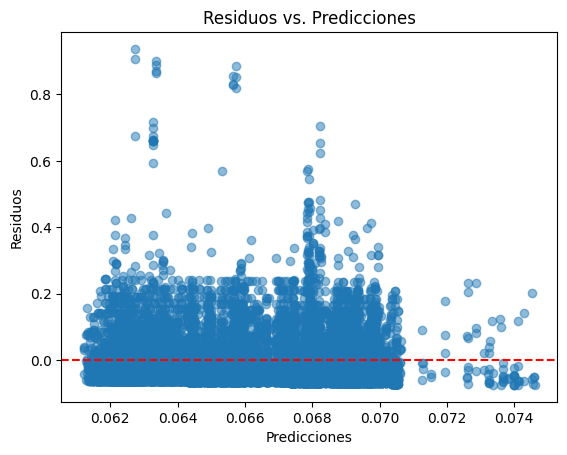

In [ ]:
# Visualization of the distribution of residuals
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=30, alpha=0.7)
plt.title('Distribución de los residuos')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

# Residuals vs Predictions
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()

324/324 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE en conjunto de prueba: 0.0874


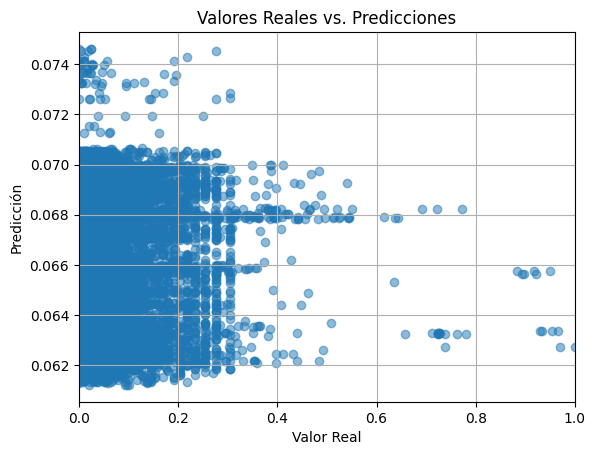

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en conjunto de prueba: {rmse:.4f}")

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.xlim(0,1)
plt.title('Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

From the graphs and results obtained, several findings can be observed. Similar results are found in MAE and MSE to those obtained in the previous algorithms, which indicates that perhaps more complexity is not necessary, or that on the other hand, a better adjustment of the model and its hyperparameters is needed. The pattern of good prediction of low values but poor prediction of high values continues, for which another alternative could be better handling of values at 0.

# **8. General Conclusions**

Model Performance: The developed models were able to reasonably predict the rates of highly capable students (HighlyCapableRate), especially for low and medium values. However, the prediction of high values was certainly poor due to the bias in the data distribution towards 0. Random Forest proved to be the best model in terms of accuracy and robustness.

Analysis Impact: The analysis seems to indicate that the population of "highly capable" students is very low, however our analysis at the moment is not robust enough to draw good conclusions. More exhaustive data handling is required to reach better conclusions.